In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
import time
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [3]:
A = (0, 2, 5)
N = range(5)

In [4]:
# 随机生成策略
def rand_pi(A, N):
    S = itertools.product(A, A, N)
    pi = {}
    for s in S:
        pi[s] = A[random.randrange(0, 3, 1)]
    return pi

# 固定策略
def fix_pi(A, N):
    S = itertools.product(A, A, N)
    pi = {}
    for s in S:
        pi[s] = 0
    return pi

In [5]:
def reward(m, r):
    if m == r:
        return 0
    elif m == 0 and r == 5:
        return -1
    elif m == 5 and r == 0:
        return 1
    elif m < r:
        return 1
    else:
        return -1

In [6]:
def derive_a(s, pi):
    if (s in pi):
        rtn = pi[s]
    else:
        rtn = [0, 2, 5][random.randrange(0, 3, 1)]
    return rtn

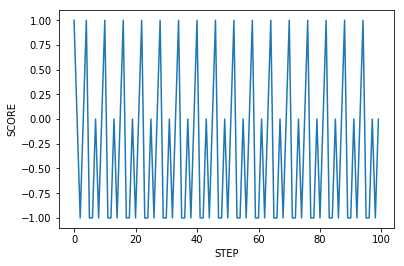

-0.32


In [7]:
scene_num = 1
play_num = 100

total_score = 0;
for i in range(scene_num):
    # 两个随机出法
    pi_m = rand_pi(A, N)
    pi_r = rand_pi(A, N)
    s = [-1, -1, 0]
    score_list = []
    for j in range(play_num):
        a_m = derive_a(tuple(s), pi_m)
        a_r = derive_a(tuple(s), pi_r)
        r = reward(a_m, a_r)
        total_score += r
        score_list.append(r)
        if s[0] == a_m and s[1] == a_r:
            cnt = s[2] + 1
        else:
            cnt = 1
        s = [a_m, a_r, cnt]

    plt.plot(range(play_num), score_list)
    plt.xlabel('STEP')
    plt.ylabel('SCORE')
    plt.show()

print(total_score / (scene_num * play_num))

In [8]:
def analysis_exp(exp, exps):
    global q_map
    global max_exp
    exps.append(exp)
    if ((tuple(exp[0]), exp[1]) in q_map):
        value = q_map[(tuple(exp[0]), exp[1])]
        q_map[(tuple(exp[0]), exp[1])] = (value[0] + 1, value[1] + exp[2])
    else:
        q_map[(tuple(exp[0]), exp[1])] = (1, exp[2])

    if (len(exps) > max_exp):
        out_dated_exp = exps.pop(0)
        value = q_map[(tuple(out_dated_exp[0]), out_dated_exp[1])]
        q_map[(tuple(out_dated_exp[0]), out_dated_exp[1])] = (value[0] - 1, value[1] - out_dated_exp[2])

In [9]:
def update_policy(pi, exp, step):
    global epsilon
    if (step < 10):
        e = epsilon
    elif (step < 200):
        e = epsilon / 8
    elif (step < 500):
        e = epsilon / 40
    else:
        e = epsilon / 100

    if random.random() < e:
        pi[tuple(exp[0])] = [0, 2, 5][random.randrange(0, 3, 1)]
        return

    max_score = -65536
    miss_a = None
    for a in A:
        if ((tuple(exp[0]), a) in q_map):
            value = q_map[(tuple(exp[0]), a)]
            if value[1] == 0 or value[0] == 0:
                score = 0
            else:
                score = value[1] / value[0]
            if score > max_score:
                max_score = score
                max_a = a
                #print("max score: ", max_score)
                #print("max a: ", max_a)
        else:
            miss_a = a

    if max_score < 0 and miss_a is not None:
        max_a = miss_a

    pi[tuple(exp[0])] = max_a

In [10]:
def graphic_action(a):
    if a == 0:
        return " *** \n*****\n *** \n"
    if a == 5:
        return " *** \n*   *\n *** \n"
    if a == 2:
        return "*   *\n * * \n  *  \n"

def graphic_reward(r):
    if r == 0:
        return "平局\n"
    if r == 1:
        return "你输了\n"
    if r == -1:
        return "你赢了\n"


*   *
 * * 
  *  

第1局:0
你赢了

 *** 
*****
 *** 

第2局:2
你输了

 *** 
*****
 *** 

第3局:5
你赢了

 *** 
*   *
 *** 

第4局:2
你赢了

 *** 
*   *
 *** 

第5局:2
你赢了

 *** 
*****
 *** 

第6局:5
你赢了

 *** 
*   *
 *** 

第7局:5
平局

 *** 
*****
 *** 

第8局:0
平局

 *** 
*   *
 *** 

第9局:2
你赢了

*   *
 * * 
  *  

第10局:5
你输了

 *** 
*   *
 *** 

第11局:0
你输了

 *** 
*   *
 *** 

第12局:5
平局

 *** 
*****
 *** 

第13局:2
你输了

 *** 
*   *
 *** 

第14局:5
平局

 *** 
*****
 *** 

第15局:5
你赢了

*   *
 * * 
  *  

第16局:2
平局

 *** 
*****
 *** 

第17局:5
你赢了

*   *
 * * 
  *  

第18局:2
平局

 *** 
*   *
 *** 

第19局:5
平局

 *** 
*   *
 *** 

第20局:2
你赢了

*   *
 * * 
  *  

第21局:5
你输了

*   *
 * * 
  *  

第22局:5
你输了

*   *
 * * 
  *  

第23局:5
你输了

*   *
 * * 
  *  

第24局:0
你赢了

 *** 
*****
 *** 

第25局:0
平局

 *** 
*****
 *** 

第26局:2
你输了

 *** 
*   *
 *** 

第27局:0
你输了

*   *
 * * 
  *  

第28局:5
你输了

*   *
 * * 
  *  

第29局:2
平局

 *** 
*   *
 *** 

第30局:5
平局

 *** 
*****
 *** 

第31局:-1
一共30局，我赢了10局，你赢了10局



/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


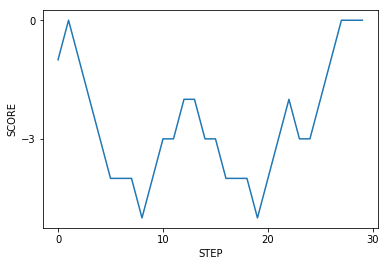

0.0


In [14]:
# 改进pi_m
with_human = 1 # 0 for random computer, 1 for human, 2 for fix policy
show_detail = 1
pi_change_rate = 100

scene_num = 1
play_num = 1000
epsilon = 0.2
max_exp = play_num

total_score = 0;
total_score2 = 0;
exp_score = 0;
for i in range(scene_num):
    exps = []
    exps2 = []
    q_map = {}
    total_score_list = []
    total_score_list2 = []
    step_list = []
    score_list = []
    pi_m = rand_pi(A, N)
    pi_r = rand_pi(A, N)
    #pi_r = fix_pi(A, N)
    s = [-1, -1, 0]
    s2 = [-1, -1, 0]
    win_cnt = 0
    lose_cnt = 0
    for j in range(play_num):
        if j % pi_change_rate == 0:
            pi_r = rand_pi(A, N)
        a_m = derive_a(tuple(s), pi_m)
        if with_human == 2:
            fix_pi = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,0,5, 2,0,5,0,5,0,0]
            #fix_pi = [0,2,0,5,2,0,5,5,2,0,0,5,2,0,5,5,2,0,2,5,2,5,2,2,0,5,0,2,5,0,2,5,2,0,0,2,5,0,5,0]
            #fix_pi = [2,2,5,5,2,2,5,5,2,5,2,5,2,5,5,5,2,2,2,5,2,5,2,2,5,5,2,2,5,5,2,5,2,2,5,2,5,2,5,5]
            if j >= len(fix_pi):
                break
            a_r = fix_pi[j]
            if a_r == -1:
                break
            if a_r is None or a_r != 0 and a_r != 2 and a_r != 5:
                continue
            #pi_r[tuple(s)] = a_r
        elif with_human == 1:
            print(graphic_action(a_m))
            string = "第" + str(j + 1) + "局:"
            iStr = input(string)
            if iStr is None or iStr == '':
                continue
            a_r = int(iStr)
            if a_r == -1:
                break
            if a_r is None or a_r != 0 and a_r != 2 and a_r != 5:
                continue
            #print(graphic_action(a_m))
            #pi_r[tuple(s)] = a_r
        else:
            a_r = derive_a(tuple(s), pi_r)

        r = reward(a_m, a_r)
        if r == 1:
            win_cnt += 1
        if r == -1:
            lose_cnt += 1
        if with_human == 1:
            print(graphic_reward(r))

        total_score += r
        total_score2 -= r
        step_list.append(j)
        total_score_list.append(total_score)
        total_score_list2.append(total_score2)
        score_list.append(r)
        analysis_exp([s, a_m, r], exps)
        analysis_exp([s2, a_r, -r], exps2)
        update_policy(pi_m, [s, a_m, r], j)
        #update_policy(pi_r, [s2, a_r, -r], j)
        if s[0] == a_m and s[1] == a_r:
            cnt = s[2] + 1
        else:
            cnt = 1
        s = [a_m, a_r, cnt]
        s2 = [a_r, a_m, cnt]

    for exp in exps:
        exp_score += exp[2]
    if show_detail != 0:
        print("一共" + str(j) + "局，我赢了" + str(win_cnt) + "局，你赢了" + str(lose_cnt) + "局\n")
        plt.plot(step_list, total_score_list)
        #plt.plot(step_list, total_score_list2)
        plt.xlabel('STEP')
        plt.ylabel('SCORE')
        ax = plt.subplot(111)
        xmajorLocator = MultipleLocator(int(j / 3))
        ymajorLocator = MultipleLocator(j / 10)
        ax.xaxis.set_major_locator(xmajorLocator)
        ax.yaxis.set_major_locator(ymajorLocator)
        plt.show()

#print(exp_score / (scene_num * max_exp))
print(total_score / ((i + 1) * (j + 1)))

## 